In [1]:
import pandas as pd 
import numpy as np 
import datetime as dt 
from pathlib import Path
%matplotlib inline

In [2]:
#Data Cleaning
#In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.Files:
#whale_returns.csv
#algo_returns.csv
#sp500_history.csv

In [3]:
# Reading whale returns
whale_returns_csv = Path("./Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count Nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [6]:
# Reading algorithmic returns
algo_returns_csv = Path("./Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns.head()


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# drop nulls
algo_returns.dropna(inplace=True)
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [9]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("./Resources/sp500_history.csv")
sp500_returns = pd.read_csv(sp500_history_csv,index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_returns.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [10]:
# Check Data Types

sp500_returns.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
sp500_returns["Close"] = sp500_returns["Close"].str.replace('$','')
sp500_returns['Close'] = sp500_returns['Close'].astype(float)
sp500_returns.dtypes

Close    float64
dtype: object

In [12]:
# Calculate Daily Returns

sp500_returns = sp500_returns.pct_change()
sp500_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [13]:
# Drop nulls 

sp500_returns = sp500_returns.dropna()
sp500_returns.head()


,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [14]:
# Rename Column

sp500_returns.columns = ["S&P 500"]
sp500_returns.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [15]:

# Concatenate all DataFrames into a single DataFrame

all_returns = pd.concat([whale_returns,sp500_returns,algo_returns], axis="columns", join="inner")
all_returns.head()



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,0.004408,-0.001942,-0.000949
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.001195,-0.008589,0.002416
2015-03-05,0.004016,0.004076,0.002355,0.006726,0.014378,-0.000955,0.004323
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.003929,-0.004957,-0.011460
2015-03-09,0.000582,0.004225,0.005843,-0.001652,0.017254,-0.005447,0.001303


Text(0.5, 1.0, 'Daily Returns')

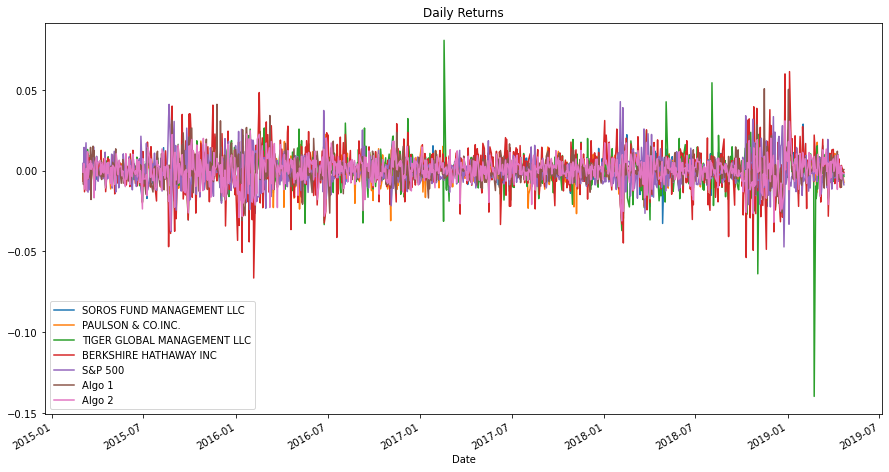

In [16]:
#Performance
# Plot daily returns
plot = all_returns.plot(legend=True, figsize = (15,8))
plot.set_title('Daily Returns')

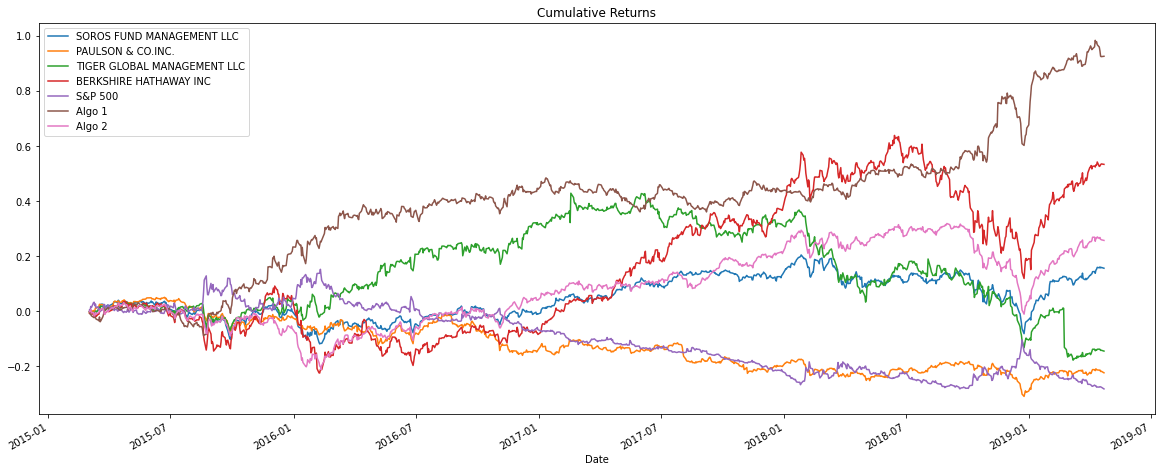

In [18]:
# Plot cumulative returns

cumulative_returns = (1+all_returns).cumprod() -1
cumulative_returns_plot = cumulative_returns.plot(legend = True, figsize=(20,8))
cumulative_returns_plot.set_title('Cumulative Returns')
cumulative_returns_plot


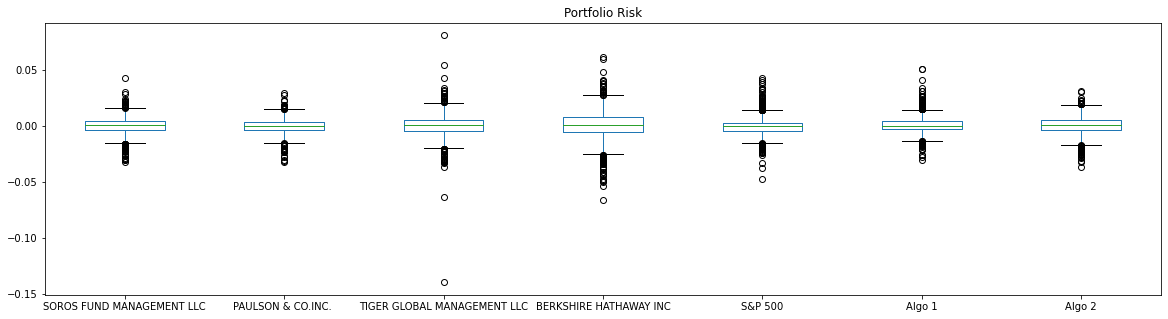

In [19]:
# Box plot to visually show risk 
boxplot = all_returns.plot.box(figsize=(20,5))
boxplot.set_title('Portfolio Risk')
boxplot

In [20]:
# Daily Standard Deviations
# Caluclate the standard deviation for each portfolio
# Which portfolios are riskier than the S&P 500?
standard_deviation = all_returns.std()
print(standard_deviation)

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
S&P 500                        0.008587
Algo 1                         0.007623
Algo 2                         0.008341
dtype: float64


In [21]:
# Determine which portfolios are riskier than the S&P 500 
risky = (standard_deviation > standard_deviation['S&P 500'])
standard_deviation['Riskier than S&P 500'] = risky
print(standard_deviation['Riskier than S&P 500'])


SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
S&P 500                        False
Algo 1                         False
Algo 2                         False
dtype: bool


In [22]:
# Calculate the annulaized standard deviation (252 trading days)
annulaized_standard_deviation = all_returns.std() * np.sqrt(252)
annulaized_standard_deviation

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
S&P 500                        0.136313
Algo 1                         0.121006
Algo 2                         0.132413
dtype: float64

Text(0.5, 1.0, '21 Day Rolling Statistics')

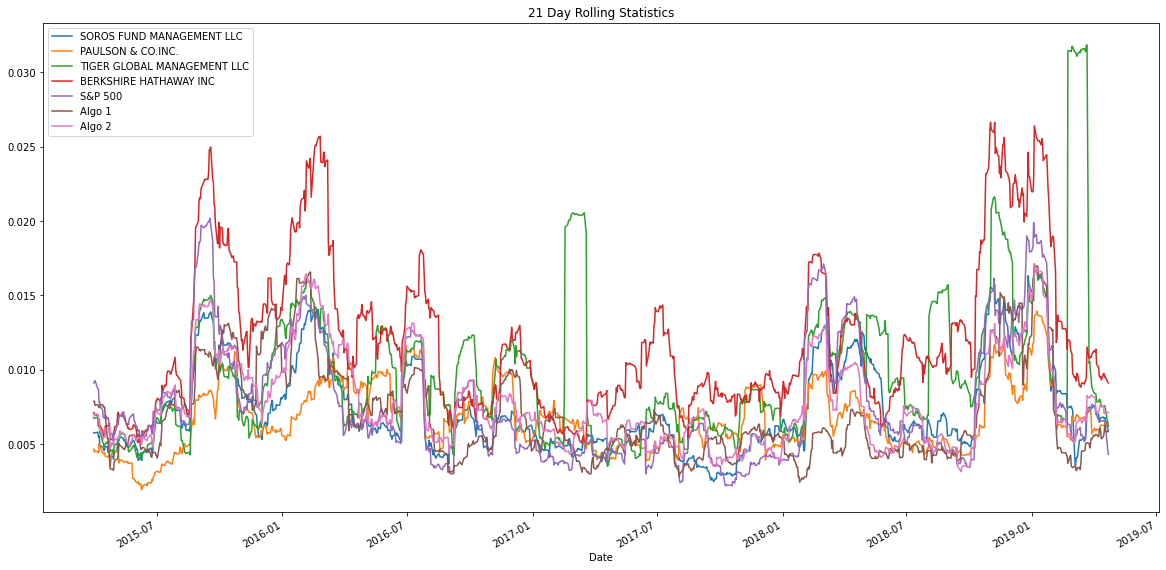

In [23]:
# Calculate and plot the rolling standard deviation for 
# the S&P 500 and whale portfolios using a 21 trading day window
rolling_standard_deviation = all_returns.rolling(21).std().plot(figsize = (20,10))
rolling_standard_deviation.set_title('21 Day Rolling Statistics')

In [24]:
# Construct a correlation table
all_returns.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.000574,0.320901,0.826730
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.013549,0.268631,0.678085
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,-0.001505,0.164114,0.507160
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,-0.013856,0.291678,0.687756
S&P 500,0.000574,0.013549,-0.001505,-0.013856,1.000000,-0.033963,-0.002192
Algo 1,0.320901,0.268631,0.164114,0.291678,-0.033963,1.000000,0.287852
Algo 2,0.826730,0.678085,0.507160,0.687756,-0.002192,0.287852,1.000000


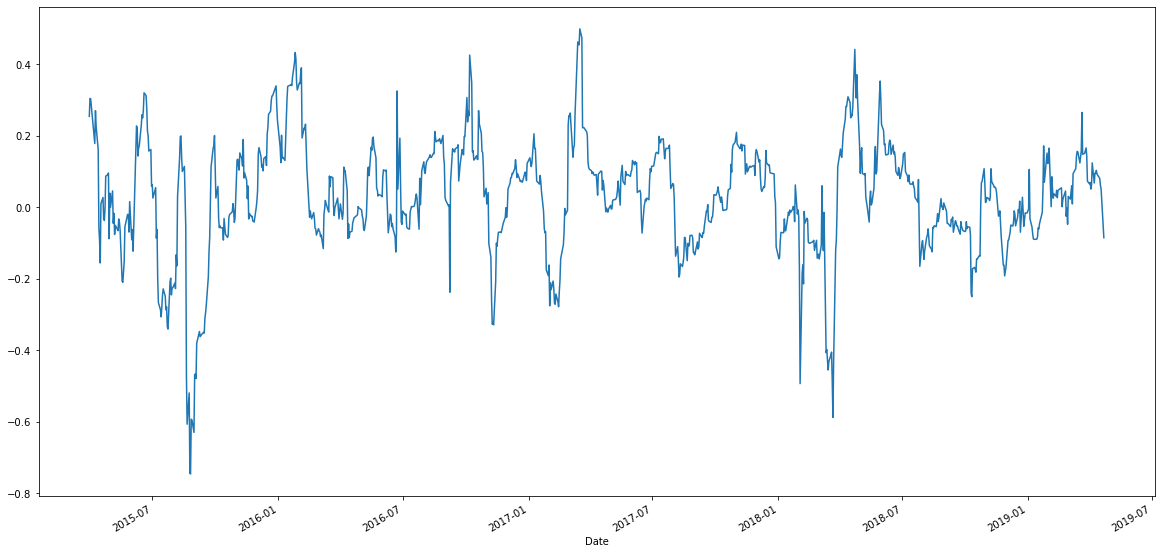

In [25]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
BerkHath_cov = all_returns['BERKSHIRE HATHAWAY INC'].rolling(21).cov(all_returns['S&P 500'])
BerkHath_var = all_returns['BERKSHIRE HATHAWAY INC'].rolling(21).var()
BerkHath_beta = BerkHath_cov/BerkHath_var

BerkHath_beta.plot(figsize = (20,10))

Text(0.5, 1.0, 'Exponential Weighted Average')

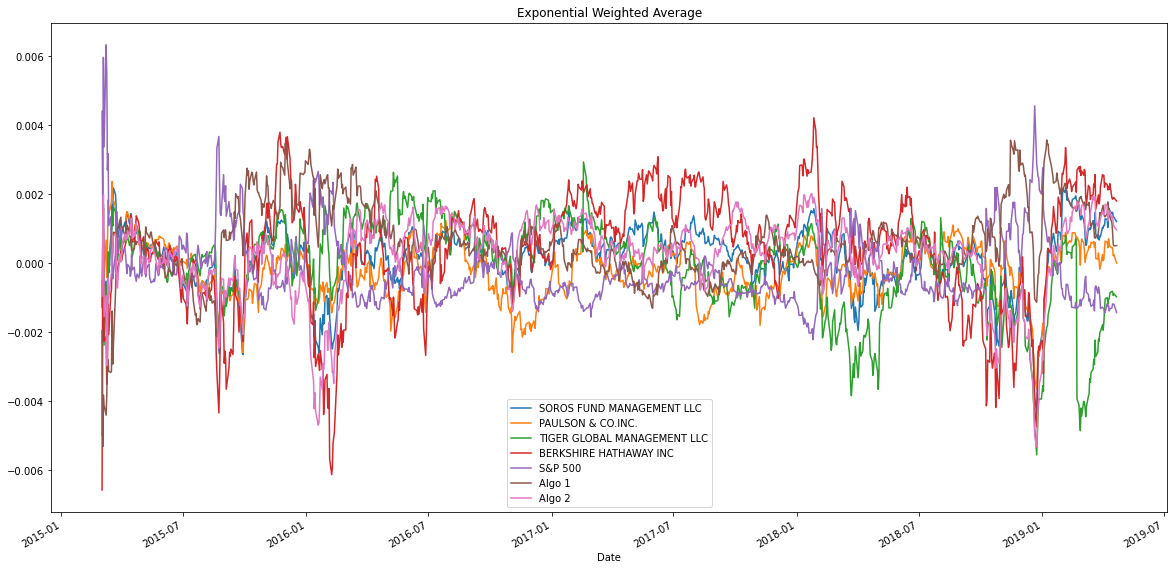

In [26]:
# Calculate a rolling window using the exponentially weighted moving average.
exp_weighted_ave = all_returns.ewm(halflife = 21).mean()
exp_weighted_ave_plot = exp_weighted_ave.plot(figsize = (20,10))
exp_weighted_ave_plot.set_title('Exponential Weighted Average')

In [27]:
# Calculate annualized Sharpe Ratios
sharpe_ratio = (all_returns.mean() * 252 / annulaized_standard_deviation)
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
S&P 500                       -0.518582
Algo 1                         1.369589
Algo 2                         0.484334
dtype: float64

Text(0.5, 1.0, 'Sharpe Ratio')

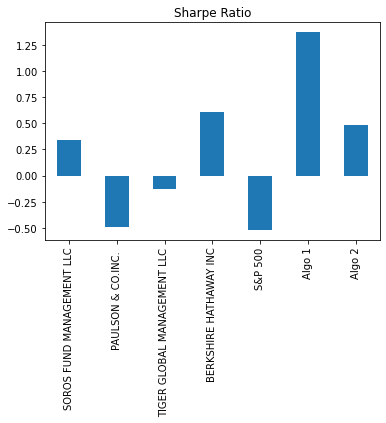

In [28]:
# visualize the sharpe ratios as bar plot 
sharpe_plot = sharpe_ratio.plot.bar()
sharpe_plot.set_title('Sharpe Ratio')


In [79]:
# Read the first stock
Path.cwd()

file_path_goog = Path('./Resources/goog_historical.csv')
file_path_aapl = Path('./Resources/aapl_historical.csv')
file_path_cost = Path('./Resources/cost_historical.csv')

goog_df = pd.read_csv(file_path_goog, parse_dates=True, index_col='Trade DATE', infer_datetime_format=True)
aapl_df = pd.read_csv(file_path_aapl, parse_dates=True, index_col='Trade DATE', infer_datetime_format=True)
cost_df = pd.read_csv(file_path_cost, parse_dates=True, index_col='Trade DATE', infer_datetime_format=True)



In [80]:
goog_df.sort_index(inplace=True)
goog_df.head(5)


,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [81]:
aapl_df.sort_index(inplace=True)
aapl_df.head(5)


,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [82]:
cost_df.sort_index(inplace=True)
cost_df.head(5)


,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [83]:
# Concatenate all stocks into a single DataFrame
all_stocks = pd.concat([goog_df, aapl_df, cost_df], axis='columns', join='inner')
all_stocks.head(5)

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2018-05-11,GOOG,1098.26,AAPL,188.59,COST,195.76
2018-05-14,GOOG,1100.20,AAPL,188.15,COST,195.88
2018-05-15,GOOG,1079.23,AAPL,186.44,COST,195.48
2018-05-16,GOOG,1081.77,AAPL,188.18,COST,198.71
2018-05-17,GOOG,1078.59,AAPL,186.99,COST,199.60


In [84]:
# Reset the index
all_stocks.index

DatetimeIndex(['2018-05-11', '2018-05-14', '2018-05-15', '2018-05-16',
               '2018-05-17', '2018-05-18', '2018-05-21', '2018-05-22',
               '2018-05-23', '2018-05-24',
               ...
               '2019-04-26', '2019-04-29', '2019-04-30', '2019-05-01',
               '2019-05-02', '2019-05-03', '2019-05-06', '2019-05-07',
               '2019-05-08', '2019-05-09'],
              dtype='datetime64[ns]', name='Trade DATE', length=250, freq=None)

In [85]:
# Pivot so that each column of prices represents a unique symbol
all_stocks.head(5)

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2018-05-11,GOOG,1098.26,AAPL,188.59,COST,195.76
2018-05-14,GOOG,1100.20,AAPL,188.15,COST,195.88
2018-05-15,GOOG,1079.23,AAPL,186.44,COST,195.48
2018-05-16,GOOG,1081.77,AAPL,188.18,COST,198.71
2018-05-17,GOOG,1078.59,AAPL,186.99,COST,199.60


In [86]:
# Drop Nulls

all_stock = all_stocks.dropna(inplace=True)
all_stocks.head(5)


,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2018-05-11,GOOG,1098.26,AAPL,188.59,COST,195.76
2018-05-14,GOOG,1100.20,AAPL,188.15,COST,195.88
2018-05-15,GOOG,1079.23,AAPL,186.44,COST,195.48
2018-05-16,GOOG,1081.77,AAPL,188.18,COST,198.71
2018-05-17,GOOG,1078.59,AAPL,186.99,COST,199.60


In [89]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
weighted_returns = all_stocks.dot(weights)
weighted_returns.head()

ValueError: Dot product shape mismatch, (250, 6) vs (3,)

In [92]:
# Add your "custom" portfolio to the larger dataframe of fund returns
#custom_portfolio = pd.concat([all_stock, weighted_returns], axis = 'columns', join = 'outer')
#custom_portfolio = custom_portfolio.rename(columns = {0: 'Custom'})
#custom_portfolio.head()

In [94]:
# Only compare dates where return data exists for all the stocks (drop Nans)
#custom_portfolio = custom_portfolio.dropna()
#custom_portfolio.head()

In [95]:
#Risk
#compare_std = custom_portfolio.std()
#compare_annual_std = compare_std * np.sqrt(252)
#compare_annual_std



In [96]:
#Rolling
#compare_std = custom_portfolio.ewm(halflife = 21).std()
#compare_std_plot = compare_std.plot(figsize = (20,10))


In [97]:
#Annualized Sharp Ratios


In [98]:
# Visualized Sharpe Ratios


In [99]:
#Visualized the shapre ratios as a bar plot


In [100]:
# Create a correlation analysis

In [101]:
#Beta